## Thinking about Model Validation
- In principle, **model validation** is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.
- The following sections first show **a naive approach to model validation and why it fails**, before exploring the use of **holdout sets** and **cross-validation** for more **robust model evaluation**.

![](https://miro.medium.com/max/4042/1*pyJ_Li4mt6dj1x_HdQv6vA@2x.jpeg)

## Model validation the wrong way

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

- We see an accuracy score of **1.0**, which indicates that 100% of points were correctly labeled by our model!
- But is this truly measuring the expected accuracy? Have we really come upon a model that we expect to be correct 100% of the time? As you may have gathered, the answer is **NO**.
- In fact, this approach contains a fundamental flaw: **it trains and evaluates the model on the same data**.

## Model validation the right way: Holdout sets

In [10]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=12,
                                  train_size=0.3)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9619047619047619

## Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set. Visually, it might look something like this:


![](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-2-fold-CV.png)

In [11]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9555555555555556, 0.9619047619047619)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5) # tach ra 5 tap train test va tinh accuracy

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [13]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut()) #test = 1 observation, train = 149 observation
scores
#LeaveOneOut gay ton nguon luc cua computer

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
len(X)

150

In [15]:
len(scores)

150

In [16]:
scores.mean()

0.96

## Selecting the Best Model

## The Bias-variance trade-off
- Bias: residuals, confusion matrix, classification_report, accuracy
- variance: accuracy (tinh tren nhieu accuracy)
- trade-off: danh doi: khi di lua chon mo hinh, buoc phai danh doi giua bias va variance

![](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-bias-variance.png)

![](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-bias-variance-2.png)

![](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-validation-curve.png)

![](https://www.researchgate.net/profile/Junhua-Ding/publication/318432363/figure/fig3/AS:667604972761097@1536180837464/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram.ppm)

In [ ]:
# variance : mo hinh co bao gom duoc tat ca cac data point hay khong

## Example 1 bias

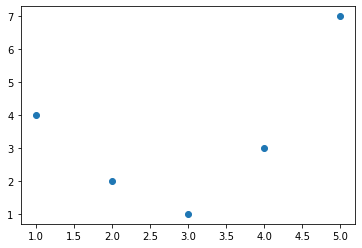

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

(5, 1)
(5,)


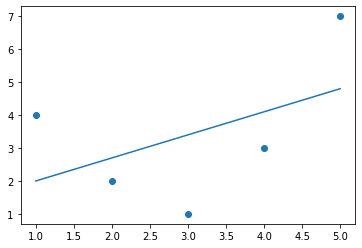

In [18]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)
print(np.shape(X))
print(np.shape(x))

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # y = ax^2 + bx + c
X2 = poly.fit_transform(X)
print(X2)

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


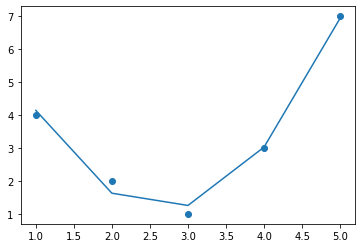

In [20]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

# Example 2

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import learning_curve

In [2]:
def PolynomialRegression(degree=2, **kwargs): #degree = 2 de tranh linear model
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

degree = 2
$$ y = ax^2 + bx + c$$

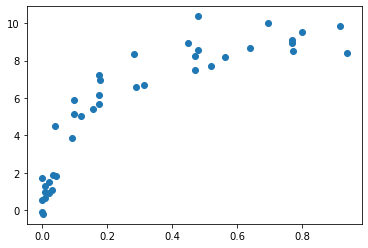

In [3]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
plt.scatter(X, y)

In [ ]:
# di tim hang y = F(x) de toi uu hoa cao nhat

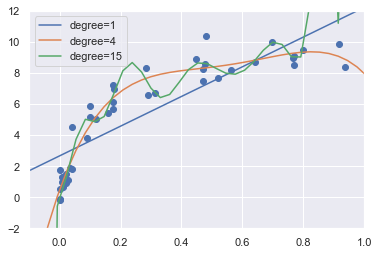

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 40)[:, None]

plt.scatter(X.ravel(), y, color='b')
axis = plt.axis()
for degree in [1, 4, 15]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

[-1.67004936e+01 -2.44010915e+02 -9.31492867e+02 -1.60842580e+03
  2.10130324e+03  2.75215280e+04  1.26799843e+05  4.34485648e+05
  1.26329115e+06  3.28559238e+06]
[0.67301646 6.98083184 9.856233   8.32873282 8.55755817 5.87386864
 7.49515774 9.997533   0.54626444 8.1929663 ]


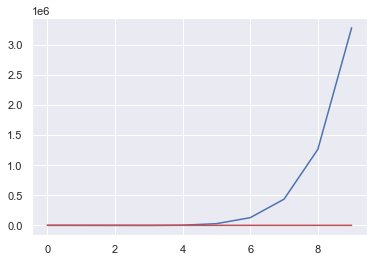

In [5]:
y_test = PolynomialRegression(15).fit(X[0:30], y[0:30]).predict(X_test[30:40])
print(y_test)
print(y[30:40])
plt.plot(y_test,c = 'b') #predict
plt.plot(y[30:40],c='r') #actual

[9.02966119 8.94121402 8.79111942 8.56573709 8.25004856 7.82765718
 7.28078808 6.59028824 5.73562644 4.69489328]
[0.67301646 6.98083184 9.856233   8.32873282 8.55755817 5.87386864
 7.49515774 9.997533   0.54626444 8.1929663 ]


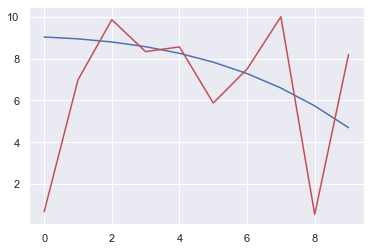

In [6]:
y_test = PolynomialRegression(4).fit(X[0:30], y[0:30]).predict(X_test[30:40])
print(y_test)
print(y[30:40])
plt.plot(y_test,c = 'b') #predict
plt.plot(y[30:40],c='r') #actual

[  6.89972951   7.01700638   6.88047462   6.53700132   6.05812182
   5.54003972   5.10362686   4.89442334   5.08263753   5.86314602
   7.4554937   10.10389368  14.07722732  19.66904427  27.19756241
  37.00566786  49.46091503  64.95552656  83.90639335 106.75507455
 133.96779758 166.03545809 203.47362001 246.82251551 296.64704501
 353.53677719 418.10594899 490.9934656  572.86290046 664.40249528]
[ 5.70193919  8.23148858  1.8305394   9.086429    1.73425177  8.92229631
  6.16043712  6.68597765  0.8992155   4.51082693  8.70162943  8.39917725
  5.14639037 10.37406543  8.96816213  9.50648826  0.9746409  -0.20201375
  1.09605993  8.50272859  0.67301646  6.98083184  9.856233    8.32873282
  8.55755817  5.87386864  7.49515774  9.997533    0.54626444  8.1929663 ]


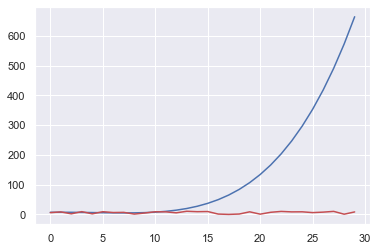

In [7]:
y_test = PolynomialRegression(4).fit(X[0:10], y[0:10]).predict(X_test[10:40])
print(y_test)
print(y[10:40])
plt.plot(y_test,c = 'b') #predict
plt.plot(y[10:40],c='r') #actual

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34]


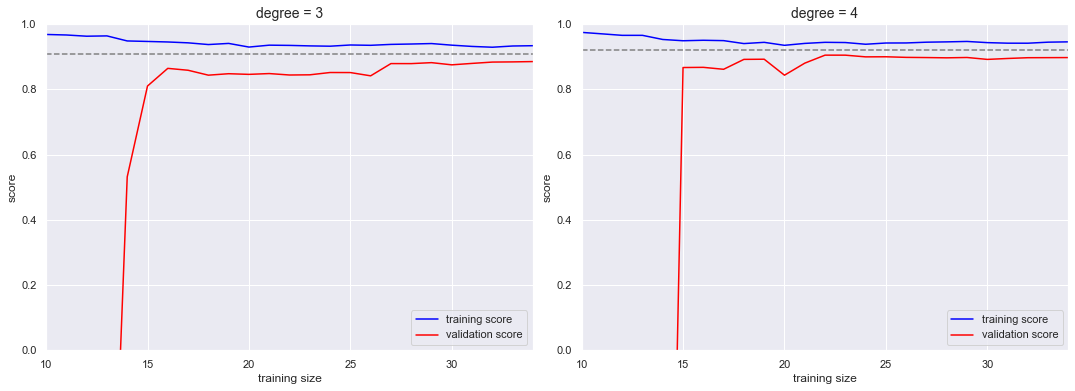

In [8]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([3, 4]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    print(N)

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [11]:
ax[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
#training socre -> train tap nao thi predict tap day va tinh accuracy
#validation score -> train tap X va predict tren data point con lai va tinh accuracy

In [39]:
np.linspace(0.3, 1, 25)

array([0.3       , 0.32916667, 0.35833333, 0.3875    , 0.41666667,
       0.44583333, 0.475     , 0.50416667, 0.53333333, 0.5625    ,
       0.59166667, 0.62083333, 0.65      , 0.67916667, 0.70833333,
       0.7375    , 0.76666667, 0.79583333, 0.825     , 0.85416667,
       0.88333333, 0.9125    , 0.94166667, 0.97083333, 1.        ])

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

In [43]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [44]:
grid.fit(X, y);

In [45]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

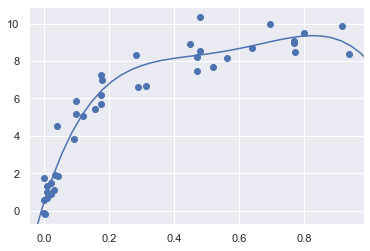

In [46]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);
#degree = 4 